In [317]:
import pandas as pd
import matplotlib

%matplotlib inline

In [318]:
df=pd.read_csv('311_geo_report.csv',parse_dates=['requested_datetime','updated_datetime','closed_date'])
df.shape

(38921, 14)

In [319]:
df.head()

,service_request_id,service_name,requested_datetime,source,description,status_description,updated_datetime,service_subtype,neighborhood_district,closed_date,location,address,lat,long
0,400578,Trash questions,2015-07-02 12:17:00,33891,DPW Sanitation,Closed,2017-06-26 20:17:00,information calls,Ward 7,2017-06-26 20:17:00,"80 Electric Ave\nSomerville, MA\n(42.403581, -...",80 Electric Ave,42.403581,-71.125199
1,400606,Request tree on public property,2015-07-02 12:59:00,43103,OSPCD,Closed,2017-06-08 12:35:00,Service Requests,Ward 5,2017-06-08 12:35:00,"32 Robinson St\nSomerville, MA\n(42.3928953, -...",32 Robinson St,42.392895,-71.101951
2,401540,Temporary no parking sign posting,2015-07-07 10:08:00,43542,Traffic and Parking,Closed,2017-06-29 15:58:00,internally generated,Ward 6,2017-06-29 15:58:00,"5 Windsor Rd\nSomerville, MA\n(42.3930438, -71...",5 Windsor Rd,42.393044,-71.115367
3,402710,Request tree on public property,2015-07-10 11:12:00,27228,OSPCD,Closed,2016-02-23 10:08:00,Service Requests,Ward 3,2016-02-23 10:08:00,"56 Lowell St\nSomerville, MA\n(42.3863771, -71...",56 Lowell St,42.386377,-71.110644
4,403238,Arborist and tree maintenance,2015-07-13 15:20:00,31420,DPW-Highway,Closed,2017-05-09 14:03:00,Service Requests,Ward 7,2017-05-09 14:03:00,"17 Sunset Rd\nSomerville, MA\n(42.4087858, -71...",17 Sunset Rd,42.408786,-71.124307


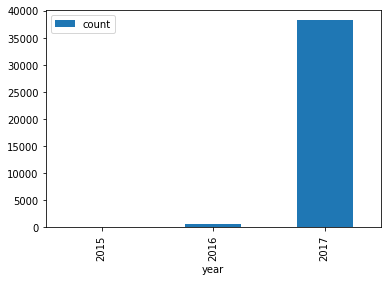

In [320]:
df['count']=1
df['year']=df.requested_datetime.dt.year
df[['year','count']].groupby('year').count().plot(kind='bar')

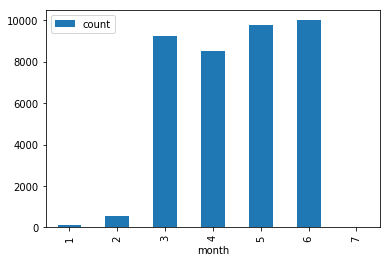

In [321]:
df=df[df['year']==2017]
df['month']=df.requested_datetime.dt.month
df[['month','count']].groupby('month').count().plot(kind='bar')

In [322]:
df=df[df.month>2]

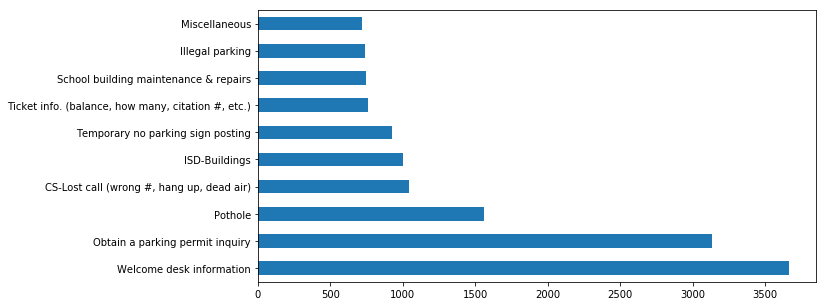

In [323]:
top_services=df.service_name.value_counts().head(10)
top_services.plot(kind='barh',figsize=(10,5))

In [324]:
df=df[df.service_name.isin(top_services.keys())]

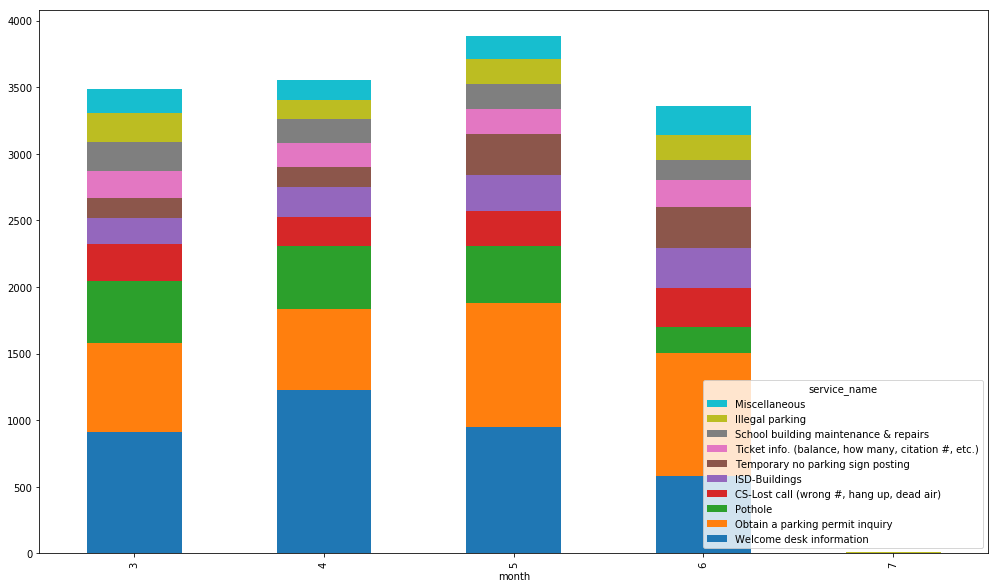

In [325]:
dg=df[['service_name','month','count']].groupby(['month','service_name']).count().unstack()
dg.columns=dg.columns.droplevel()
dg=dg[list(top_services.keys())]
dg.plot(figsize=(17,10),kind='bar',stacked=True,legend='reverse')

In [327]:
df['hour']=df.requested_datetime.dt.hour

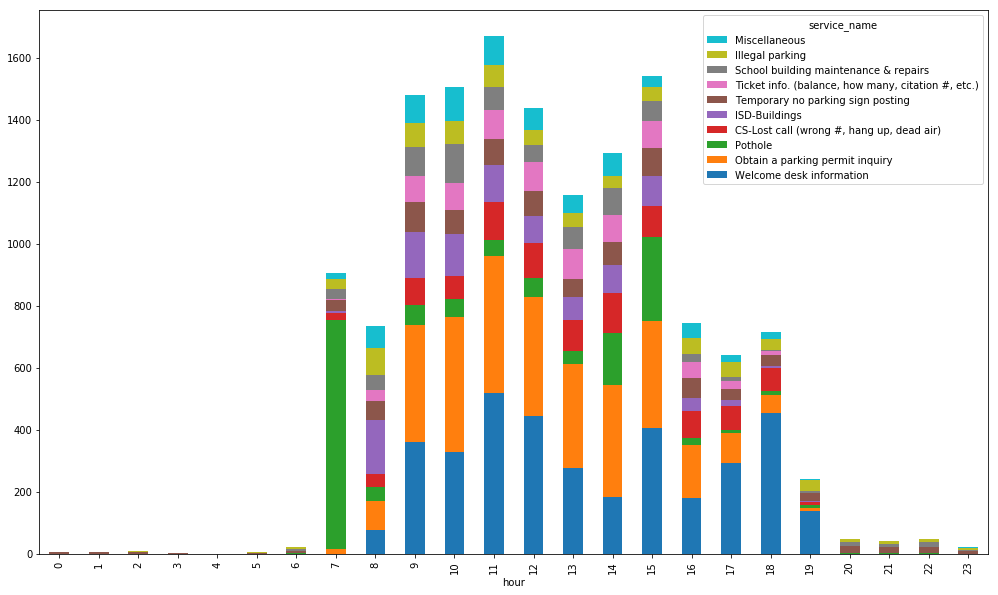

In [328]:
dg=df[['service_name','hour','count']].groupby(['hour','service_name']).count().unstack()
dg.columns=dg.columns.droplevel()
dg=dg[list(top_services.keys())]
dg.plot(figsize=(17,10),kind='bar',stacked=True,legend='reverse')

In [329]:
df['response_time']=df.closed_date-df.requested_datetime
df['response_days']=df.response_time.dt.days

In [330]:
df=df[df.response_time.dt.seconds>0]
df=df[df.response_days<10]

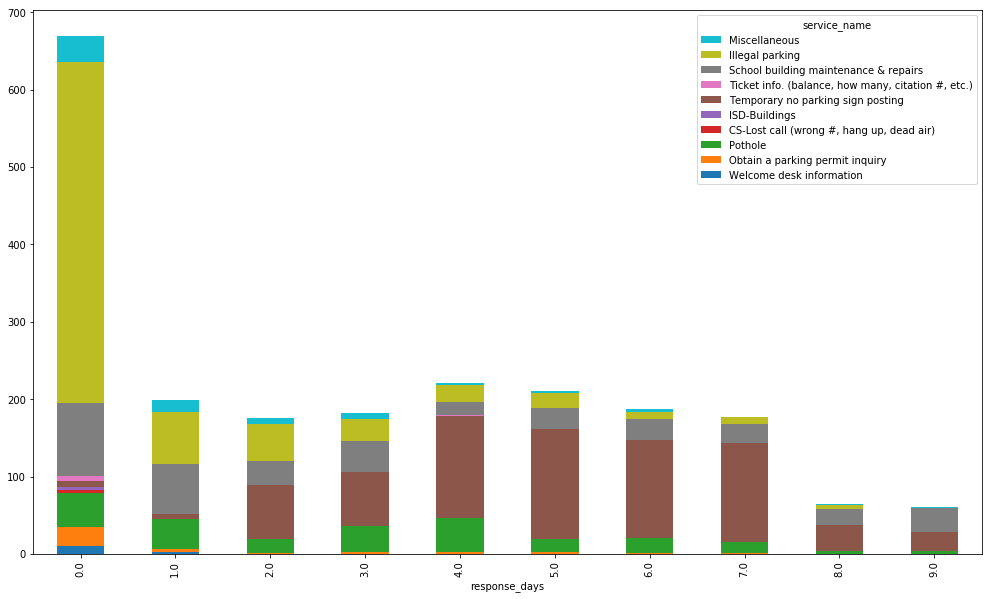

In [331]:
dg=df[['service_name','response_days','count']].groupby(['response_days','service_name']).count().unstack()
dg.columns=dg.columns.droplevel()
dg=dg[list(top_services.keys())]
dg.plot(figsize=(17,10),kind='bar',stacked=True,legend='reverse')